<a href="https://colab.research.google.com/github/GabrielVillagran/CodeCademy/blob/main/CodecademyProject_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
# Uploading data from local machine
uploaded = files.upload()
df = pd.read_csv("admissions_data.csv")
# split data in labels and features
labels = df.iloc[:, -1] # Change of admit
features = df.iloc[:,0:-1]
# converting data into numerical values with hot encoding
features = pd.get_dummies(features)
print(labels, features)

Saving admissions_data.csv to admissions_data (5).csv
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120            

In [ ]:
# Training sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, random_state = 23)
# scale or normalize your data so that all columns/features have equal weight in the learning model.
# Standarize the column values
numerical_features = features.select_dtypes(include=['float64','int64'])
numerical_columns = numerical_features.columns
ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder = 'passthrough')
#  Fit instances
features_train_scaled = ct.fit_transform(features_train)
# Transform data
features_test_scaled = ct.transform(features_test)
# Building the model
my_model = Sequential()
# Creating an input layer and adding it into the model
input = InputLayer(input_shape = (features.shape[1], ))
my_model.add(input)
my_model.add(Dense(64, activation = "relu"))
opt = Adam(learning_rate = 0.01)
# compile the model and ploting th values
my_model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)
historicalData = my_model.fit(features_train_scaled, labels_train, epochs = 20, batch_size = 1, verbose = 0)
# model evaluation
res_mse, res_mae = my_model.evaluate(features_test_scaled, labels_test, verbose = 1)
# Printing the values
print("Mean Squared Error: ", res_mse, "Mean Absolute Error: ", res_mae)
# The lower the MAE, the better a model fits a dataset.
# The lower the RMSE, the better a model fits a dataset.



4/4 [==============================] - 0s 11ms/step - loss: 0.0102 - mae: 0.0757
Mean Squared Error:  0.010179026983678341 Mean Absolute Error:  0.07571367919445038


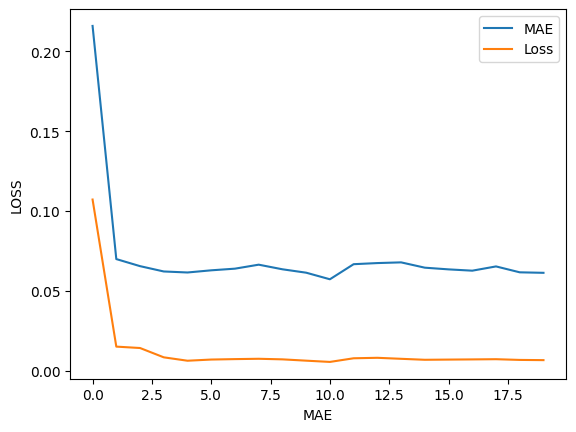

In [ ]:
plt.plot(historicalData.history['mae'], label = 'MAE')
plt.plot(historicalData.history['loss'], label = 'Loss')
plt.xlabel('MAE')
plt.ylabel('LOSS')
plt.legend()
plt.show()

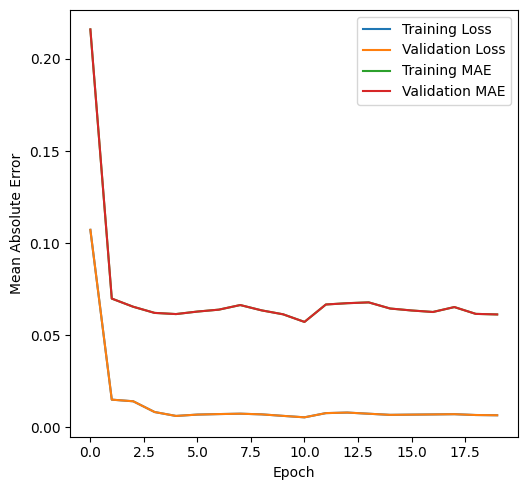

In [ ]:
# Plot the loss per epoch
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historicalData.history['loss'], label='Training Loss')
plt.plot(historicalData.history['loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the MAE per epoch
# plt.subplot(1, 2, 2)
plt.plot(historicalData.history['mae'], label='Training MAE')
plt.plot(historicalData.history['mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Save the plot as an image
plt.tight_layout()
# plt.savefig('static/images/my_plots.png')
plt.show()